<a href="https://colab.research.google.com/github/JUHYUN030/Hanium_project/blob/main/%EB%A7%A4%EB%A7%A4%EA%B0%80%EA%B2%A9%EC%A7%80%EC%88%98_RF_%EA%B8%88%EB%A6%AC%EC%B6%94%EA%B0%80_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 기간 : 2012년 6월 ~ 2020년 12월
* 독립변수 : 코스피지수, MA3, MA6, 기준금리
* 종속변수 : 아파트 매매지수
* 트리 수:  상한 200, 하한 10
* 최대 깊이(Max Depth) : 상한 8, 하한 4


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('/content/월간_매매가격지수_아파트_수정_202012.csv', encoding= 'utf-8')
df 

,년월,매매가격지수
0,2012-01-01,78.997
1,2012-02-01,78.797
2,2012-03-01,78.456
3,2012-04-01,78.012
4,2012-05-01,77.588
...,...,...
103,2020-08-01,95.849
104,2020-09-01,96.131
105,2020-10-01,96.241
106,2020-11-01,96.354


In [ ]:
df1 = pd.read_csv('/content/월별_코스피지수_수정_202012.csv', encoding= 'utf-8')
df1

,시점,코스피지수
0,2012. 01,1891.01
1,2012. 02,2003.23
2,2012. 03,2023.41
3,2012. 04,1995.92
4,2012. 05,1886.35
...,...,...
103,2020. 08,2349.87
104,2020. 09,2371.52
105,2020. 10,2357.82
106,2020. 11,2504.18


In [ ]:
df1['MA3'] = df['매매가격지수'].rolling(3).mean()
df1

,시점,코스피지수,MA3
0,2012. 01,1891.01,NaN
1,2012. 02,2003.23,NaN
2,2012. 03,2023.41,78.750000
3,2012. 04,1995.92,78.421667
4,2012. 05,1886.35,78.018667
...,...,...,...
103,2020. 08,2349.87,95.149000
104,2020. 09,2371.52,95.769333
105,2020. 10,2357.82,96.073667
106,2020. 11,2504.18,96.242000


In [ ]:
df1['MA6'] = df['매매가격지수'].rolling(6).mean()
df1[:7]

,시점,코스피지수,MA3,MA6
0,2012. 01,1891.01,NaN,NaN
1,2012. 02,2003.23,NaN,NaN
2,2012. 03,2023.41,78.750000,NaN
3,2012. 04,1995.92,78.421667,NaN
4,2012. 05,1886.35,78.018667,NaN
5,2012. 06,1848.60,77.525333,78.137667
6,2012. 07,1826.75,77.006667,77.714167


In [ ]:
df1['매매가격지수'] = df['매매가격지수']
df1

,시점,코스피지수,MA3,MA6,매매가격지수
0,2012. 01,1891.01,NaN,NaN,78.997
1,2012. 02,2003.23,NaN,NaN,78.797
2,2012. 03,2023.41,78.750000,NaN,78.456
3,2012. 04,1995.92,78.421667,NaN,78.012
4,2012. 05,1886.35,78.018667,NaN,77.588
...,...,...,...,...,...
103,2020. 08,2349.87,95.149000,94.726333,95.849
104,2020. 09,2371.52,95.769333,95.010000,96.131
105,2020. 10,2357.82,96.073667,95.327333,96.241
106,2020. 11,2504.18,96.242000,95.695500,96.354


In [ ]:
df2 = pd.read_csv('/content/기준금리_수정_202012.csv', encoding= 'utf-8')
df2

,시점,기준금리
0,2012-01-01,3.25
1,2012-02-01,3.25
2,2012-03-01,3.25
3,2012-04-01,3.25
4,2012-05-01,3.25
...,...,...
103,2020-08-01,0.50
104,2020-09-01,0.50
105,2020-10-01,0.50
106,2020-11-01,0.50


In [ ]:
df1['기준금리'] = df2['기준금리']
df1

,시점,코스피지수,MA3,MA6,매매가격지수,기준금리
0,2012. 01,1891.01,NaN,NaN,78.997,3.25
1,2012. 02,2003.23,NaN,NaN,78.797,3.25
2,2012. 03,2023.41,78.750000,NaN,78.456,3.25
3,2012. 04,1995.92,78.421667,NaN,78.012,3.25
4,2012. 05,1886.35,78.018667,NaN,77.588,3.25
...,...,...,...,...,...,...
103,2020. 08,2349.87,95.149000,94.726333,95.849,0.50
104,2020. 09,2371.52,95.769333,95.010000,96.131,0.50
105,2020. 10,2357.82,96.073667,95.327333,96.241,0.50
106,2020. 11,2504.18,96.242000,95.695500,96.354,0.50


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시점      108 non-null    object 
 1   코스피지수   108 non-null    float64
 2   MA3     106 non-null    float64
 3   MA6     103 non-null    float64
 4   매매가격지수  108 non-null    float64
 5   기준금리    108 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.2+ KB


In [ ]:
df1 = df1.drop(df1.index[:5]) 
df1

,시점,코스피지수,MA3,MA6,매매가격지수,기준금리
5,2012. 06,1848.60,77.525333,78.137667,76.976,3.25
6,2012. 07,1826.75,77.006667,77.714167,76.456,3.00
7,2012. 08,1918.91,76.400667,77.209667,75.770,3.00
8,2012. 09,1961.29,75.830000,76.677667,75.264,3.00
9,2012. 10,1942.19,75.277000,76.141833,74.797,2.75
...,...,...,...,...,...,...
103,2020. 08,2349.87,95.149000,94.726333,95.849,0.50
104,2020. 09,2371.52,95.769333,95.010000,96.131,0.50
105,2020. 10,2357.82,96.073667,95.327333,96.241,0.50
106,2020. 11,2504.18,96.242000,95.695500,96.354,0.50


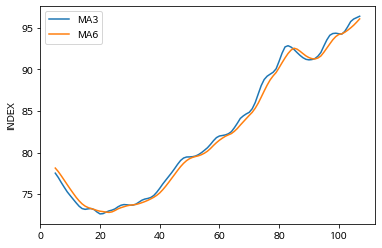

In [ ]:
df1[['MA3','MA6']].plot()
plt.ylabel("INDEX")
plt.show()

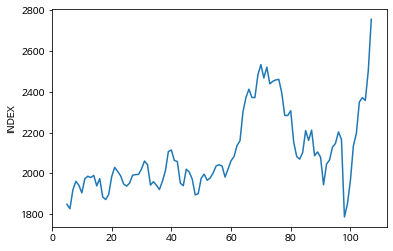

In [ ]:
df1['코스피지수'].plot()
plt.ylabel("INDEX")
plt.show()

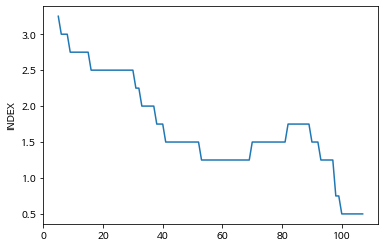

In [ ]:
df1['기준금리'].plot()
plt.ylabel("INDEX")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# feature standardization  (numerical_columns except dummy var.-"CHAS")
scaler = 		MinMaxScaler()  # 최대/최소값이 각각 1, 0이 되도록 스케일링
scale_columns = ['매매가격지수','코스피지수', 'MA3', 'MA6', '기준금리']
df1[scale_columns] = scaler.fit_transform(df1[scale_columns])

In [ ]:
numerical_columns = ['코스피지수', 'MA3', 'MA6', '기준금리']

X = df1[numerical_columns]
y = df1['매매가격지수']

In [ ]:
df1

,시점,코스피지수,MA3,MA6,매매가격지수,기준금리
5,2012. 06,0.063827,0.206175,0.229090,0.186066,1.000000
6,2012. 07,0.041279,0.184369,0.210903,0.164527,0.909091
7,2012. 08,0.136385,0.158891,0.189236,0.136111,0.909091
8,2012. 09,0.180120,0.134899,0.166389,0.115152,0.909091
9,2012. 10,0.160409,0.111650,0.143377,0.095808,0.818182
...,...,...,...,...,...,...
103,2020. 08,0.581123,0.947111,0.941514,0.967815,0.000000
104,2020. 09,0.603465,0.973191,0.953697,0.979496,0.000000
105,2020. 10,0.589327,0.985986,0.967325,0.984053,0.000000
106,2020. 11,0.740367,0.993063,0.983136,0.988733,0.000000


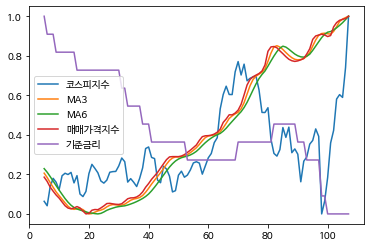

In [ ]:
df1.plot()

In [ ]:
X

,코스피지수,MA3,MA6,기준금리
5,0.063827,0.206175,0.229090,1.000000
6,0.041279,0.184369,0.210903,0.909091
7,0.136385,0.158891,0.189236,0.909091
8,0.180120,0.134899,0.166389,0.909091
9,0.160409,0.111650,0.143377,0.818182
...,...,...,...,...
103,0.581123,0.947111,0.941514,0.000000
104,0.603465,0.973191,0.953697,0.000000
105,0.589327,0.985986,0.967325,0.000000
106,0.740367,0.993063,0.983136,0.000000


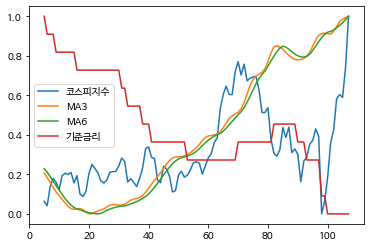

In [ ]:
X.plot()

In [ ]:
y.head()

5    0.186066
6    0.164527
7    0.136111
8    0.115152
9    0.095808
Name: 매매가격지수, dtype: float64

# 상관관계 분석

In [ ]:
# Person 상관계수
cols = ['매매가격지수', '코스피지수', '기준금리', 'MA3', 'MA6']

corr = df1[cols].corr(method = 'pearson')
corr

,매매가격지수,코스피지수,기준금리,MA3,MA6
매매가격지수,1.000000,0.575600,-0.759333,0.998969,0.995167
코스피지수,0.575600,1.000000,-0.516293,0.560750,0.544064
기준금리,-0.759333,-0.516293,1.000000,-0.744881,-0.722958
MA3,0.998969,0.560750,-0.744881,1.000000,0.998167
MA6,0.995167,0.544064,-0.722958,0.998167,1.000000


# 데이터셋 분리

In [ ]:
train = df1.loc[:89]    # 2012.06 ~ 2019.6
test = df1.loc[90:]   # 2019.07 ~ 2020.12

In [ ]:
train.head()

,시점,코스피지수,MA3,MA6,매매가격지수,기준금리
5,2012. 06,0.063827,0.206175,0.229090,0.186066,1.000000
6,2012. 07,0.041279,0.184369,0.210903,0.164527,0.909091
7,2012. 08,0.136385,0.158891,0.189236,0.136111,0.909091
8,2012. 09,0.180120,0.134899,0.166389,0.115152,0.909091
9,2012. 10,0.160409,0.111650,0.143377,0.095808,0.818182


In [ ]:
train.tail()

,시점,코스피지수,MA3,MA6,매매가격지수,기준금리
85,2019. 02,0.436988,0.831803,0.848585,0.810579,0.454545
86,2019. 03,0.387154,0.816598,0.843875,0.795460,0.454545
87,2019. 04,0.438969,0.802304,0.833082,0.782412,0.454545
88,2019. 05,0.309746,0.790224,0.820641,0.774874,0.454545
89,2019. 06,0.328734,0.782096,0.808724,0.771436,0.454545


In [ ]:
test.head()

,시점,코스피지수,MA3,MA6,매매가격지수,기준금리
90,2019. 07,0.302089,0.779293,0.799991,0.774128,0.363636
91,2019. 08,0.162525,0.780848,0.794616,0.779471,0.363636
92,2019. 09,0.266723,0.785921,0.793056,0.786430,0.363636
93,2019. 10,0.287920,0.797763,0.797672,0.809129,0.272727
94,2019. 11,0.352975,0.816710,0.808144,0.835473,0.272727


In [ ]:
test.tail()

,시점,코스피지수,MA3,MA6,매매가격지수,기준금리
103,2020. 08,0.581123,0.947111,0.941514,0.967815,0.0
104,2020. 09,0.603465,0.973191,0.953697,0.979496,0.0
105,2020. 10,0.589327,0.985986,0.967325,0.984053,0.0
106,2020. 11,0.740367,0.993063,0.983136,0.988733,0.0
107,2020. 12,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
X_train = train[['코스피지수','MA3','MA6', '기준금리']]
y_train = train[['매매가격지수']]
X_test = test[['코스피지수','MA3','MA6', '기준금리']]
y_test = test[['매매가격지수']]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(85, 4) (85, 1) (18, 4) (18, 1)


# RandomForest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=20,
                              max_depth=5,
                              n_jobs=-1,
                              random_state=5)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([0.79151109, 0.79151109, 0.78926977, 0.7929418 , 0.82072384,
       0.82565239, 0.80474488, 0.80979624, 0.81801684, 0.81801684,
       0.81801684, 0.81722983, 0.80474488, 0.78343433, 0.7808605 ,
       0.78343433, 0.7759829 , 0.7759829 ])

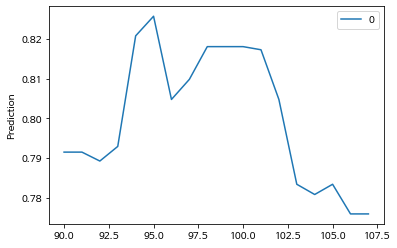

In [ ]:
pd.DataFrame(y_pred, index=y_test.index).plot()
plt.ylabel("Prediction")
plt.show()

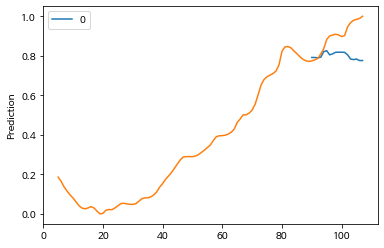

In [ ]:
pd.DataFrame(y_pred, index=y_test.index).plot()
plt.ylabel("Prediction")
df1['매매가격지수'].plot()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 0.015610266449482086
RMSE: 0.12494105189841362


#k-fold cross validation

In [ ]:
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=10) 
num_iter = 0 
cv_rmse = []

In [ ]:
for train_idx, test_idx in kfold.split(X):
  X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :] 
  y_train, y_test = y.iloc[train_idx], y.iloc[test_idx] 
  
  rf_model.fit(X_train, y_train) 
  y_pred = rf_model.predict(X_test) 
  num_iter = num_iter + 1 
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  
  print("{}번 검증 셋 rmse : {} ".format(num_iter, rmse)) 
  cv_rmse.append(rmse) 
  
print("mean of rmse : {} ".format(round(np.mean(rmse),7)))

1번 검증 셋 rmse : 0.04726067476635547 
2번 검증 셋 rmse : 0.021890293615503965 
3번 검증 셋 rmse : 0.026182187413308414 
4번 검증 셋 rmse : 0.041602782063254684 
5번 검증 셋 rmse : 0.03021689154044028 
6번 검증 셋 rmse : 0.042126541401571495 
7번 검증 셋 rmse : 0.05996813975065352 
8번 검증 셋 rmse : 0.026613796420462084 
9번 검증 셋 rmse : 0.05033090065773079 
10번 검증 셋 rmse : 0.08055935982140953 
mean of rmse : 0.0805594 


# GridSearchCV

In [ ]:
params ={
    'n_estimators':[10, 20, 50, 100],
    'max_depth':[4, 5, 6, 7, 8, 9, 10]
    }

In [ ]:
rf_reg = RandomForestRegressor()

In [ ]:
grid_cv = GridSearchCV(estimator=rf_reg, 
                       param_grid=params, 
                       cv=kfold,
                       n_jobs=-1)
grid_cv.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_cv.cv_results_) 
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024316,0.002548,0.003376,0.000655,4,10,"{'max_depth': 4, 'n_estimators': 10}",0.748993,-4.593802,-3.733129,0.727727,-2.747755,-0.132675,-0.451059,-0.817065,-3.141187,-0.901914,-1.504187,1.806195,26
1,0.044577,0.001766,0.004259,0.000146,4,20,"{'max_depth': 4, 'n_estimators': 20}",0.417363,-5.561480,-3.977865,0.422341,-3.234249,0.568347,-1.284606,-0.162799,-1.824388,-0.203580,-1.484092,2.022639,25
2,0.106472,0.006614,0.007296,0.000812,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.349498,-4.979432,-3.161847,0.796146,-4.517940,0.556046,-1.258336,-0.268865,-1.377290,-0.278049,-1.414007,1.997618,24
3,0.215493,0.006670,0.012828,0.001299,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.460551,-5.497057,-3.021501,0.802728,-3.133758,0.561720,-1.107687,-0.281922,-1.513519,-0.313179,-1.304362,1.924090,22
4,0.023163,0.002088,0.003311,0.000455,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.133561,-2.762475,-2.331615,0.685786,-1.165259,0.646920,-1.125968,-0.299357,-1.642154,-0.199055,-0.805962,1.137108,1
5,0.043487,0.001978,0.004779,0.001283,5,20,"{'max_depth': 5, 'n_estimators': 20}",0.399656,-3.688254,-1.913249,0.656509,-5.689195,0.195972,-1.864971,-0.644689,-0.925199,-0.139484,-1.361290,1.910442,23
6,0.104495,0.004682,0.007301,0.001175,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.266263,-4.799728,-2.244660,0.749952,-2.932757,0.517279,-0.809181,-0.285198,-1.858308,-0.317935,-1.171427,1.677675,20
7,0.205124,0.004838,0.011451,0.000367,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.535359,-3.706891,-2.042660,0.745536,-2.795497,0.691873,-0.993244,-0.409768,-1.300628,0.009200,-0.926672,1.459739,6
8,0.022799,0.001658,0.003326,0.000542,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.449576,-3.913784,-2.961474,-0.134828,-11.758879,0.541839,-1.107128,-0.108157,-1.060064,0.265360,-1.978754,3.551761,28
9,0.044422,0.004075,0.004383,0.001149,6,20,"{'max_depth': 6, 'n_estimators': 20}",0.461462,-3.911411,-2.600620,0.674146,-1.795040,0.025107,-1.061011,-0.193280,-1.347211,-1.440008,-1.118787,1.359686,19


In [ ]:
print(type(grid_cv))
scores_df[['params', 'rank_test_score']]

<class 'sklearn.model_selection._search.GridSearchCV'>


,params,rank_test_score
0,"{'max_depth': 4, 'n_estimators': 10}",26
1,"{'max_depth': 4, 'n_estimators': 20}",25
2,"{'max_depth': 4, 'n_estimators': 50}",24
3,"{'max_depth': 4, 'n_estimators': 100}",22
4,"{'max_depth': 5, 'n_estimators': 10}",1
5,"{'max_depth': 5, 'n_estimators': 20}",23
6,"{'max_depth': 5, 'n_estimators': 50}",20
7,"{'max_depth': 5, 'n_estimators': 100}",6
8,"{'max_depth': 6, 'n_estimators': 10}",28
9,"{'max_depth': 6, 'n_estimators': 20}",19


In [ ]:
grid_cv.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [ ]:
rfc1=RandomForestRegressor(max_depth= 10,
                           n_estimators= 10,
                           n_jobs=-1,
                           random_state = 0)

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
pred=rfc1.predict(X_test)
pred

array([0.88402784, 0.88402784, 0.88402784, 0.8969348 , 0.90309833,
       0.90309833, 0.90309833, 0.90309833, 0.90309833, 0.90309833])

In [ ]:
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 0.06036395927635389


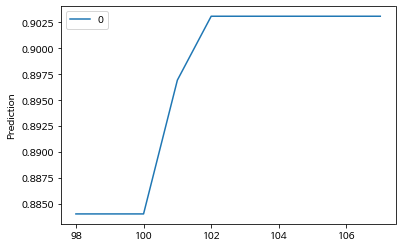

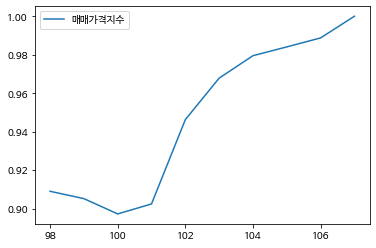

In [ ]:
pd.DataFrame(pred, index=y_test.index).plot()
plt.ylabel("Prediction")
df1.loc[98:, ['매매가격지수']].plot()
plt.show()